In [1]:
#Import required Libraries

import pandas as pd
import seaborn as sns
import numpy as np

#import data
nobel_data = pd.read_csv('completeNobel.csv')

#print(nobel_data.info())

In [2]:
# Find the most commonly awarded gender and birth country
top_gender = nobel_data['gender'].value_counts().index[0]
top_country = nobel_data['birth_country'].value_counts().index[0]

print('The gender with the most Nobel Laureates is: ', top_gender)
print('The most common birth country of Nobel Laureates is: ', top_country)


The gender with the most Nobel Laureates is:  male
The most common birth country of Nobel Laureates is:  USA


2000


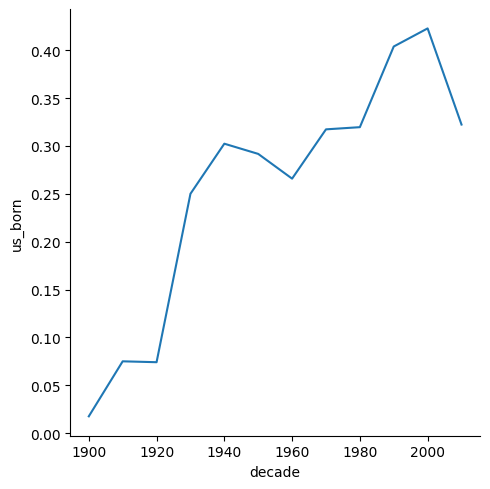

In [3]:
# Find the decade with the highest ratio of US-born Nobel Prize winners to Total winners
nobel_data['us_born'] = nobel_data['birth_country'] == 'USA'
nobel_data['decade'] = (np.floor(nobel_data['awardYear'] / 10) * 10).astype(int)
ratio_us = nobel_data.groupby('decade', as_index=False)['us_born'].mean()
max_decade_usa = ratio_us[ratio_us['us_born'] == ratio_us['us_born'].max()]['decade'].values[0]
print(max_decade_usa)

sns.relplot(kind='line', data=ratio_us, x='decade', y='us_born')

In [11]:
# Find the decade and category with highest ratio of Female Nobel Prize winners
nobel_data['female_winner'] = nobel_data['gender'] == 'female'
ratio_female = nobel_data.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
max_female = ratio_female[ratio_female['female_winner'] == ratio_female['female_winner'].max()][['decade','category']]
max_female_decade = max_female['decade'].values[0]
max_female_category = max_female['category'].values[0]
print('The ', max_female_decade,'decade, in the', max_female_category,'category, has the highest ratio of female winners')

The  2010 decade, in the Peace category, has the highest ratio of female winners


In [5]:
# Find the Nigerians that have won a Nobel Prize, and who is the first
first_nigerian = nobel_data[nobel_data['birth_country'] == 'Nigeria']

#since the above return only one record, no need to find the earliest date
first_nigerian_name = first_nigerian['fullName'].values[0]
first_nigerian_category = first_nigerian['category'].values[0]
print('The only Nigerian to win a Nobel Prize is:', first_nigerian_name,', for the',first_nigerian_category, 'category') 

The only Nigerian to win a Nobel Prize is: Wole Soyinka , for the Literature category


In [6]:
# Individuals that are repeat Nobel Prize winners
nobel_repeats = nobel_data['fullName'].value_counts()
repeat_list = list(nobel_repeats[nobel_repeats >= 2].index)
print(repeat_list)

['Frederick Sanger', 'John Bardeen', 'Marie Curie, née Sklodowska', 'Linus Carl Pauling']
